In [1]:
pip install tensorflow pillow


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
from google.colab import files

print("📂 Upload your trained .keras model file")
uploaded_model = files.upload()

model_path = list(uploaded_model.keys())[0]
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

📂 Upload your trained .keras model file


Saving Crop_Disease_Detection.keras to Crop_Disease_Detection.keras
✅ Model loaded successfully!


In [21]:
print("📂 Upload a leaf image (JPG/PNG)")
uploaded_img = files.upload()

img_path = list(uploaded_img.keys())[0]

def preprocess(img_path, target_size=(160,160)):   # ✅ changed from (224,224) → (160,160)
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array, img

📂 Upload a leaf image (JPG/PNG)


Saving corn.JPG to corn.JPG


In [22]:
img_array, display_img = preprocess(img_path)
preds = model.predict(img_array)
class_idx = np.argmax(preds, axis=1)[0]
confidence = np.max(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [23]:
class_labels = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves'
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
predicted_class = class_labels[class_idx]

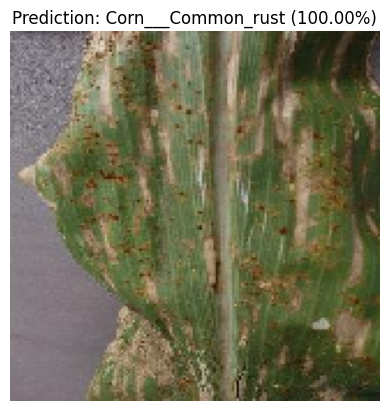

In [24]:
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Prediction: {predicted_class} ({confidence*100:.2f}%)")
plt.show()

